In [ ]:
###··· TURBINE DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


#Load the dataset
turbine_dataset = pd.read_csv("A1-turbine.txt", sep='\t', header=0)
x = turbine_dataset[['#height_over_sea_level', 'fall', 'net_fall', 'flow']] 
y = turbine_dataset[["power_of_hydroelectrical_turbine"]]
#Scale the data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)
validation_percentage=0.15


Epoch  1 / 100
============= [loss:  0.0786  - mae:  0.2391  - val_loss:  0.0607  - val_mae:   0.2009 ]
Epoch  2 / 100
============= [loss:  0.0744  - mae:  0.2318  - val_loss:  0.0565  - val_mae:   0.1917 ]
Epoch  3 / 100
============= [loss:  0.0708  - mae:  0.2259  - val_loss:  0.0534  - val_mae:   0.1855 ]
Epoch  4 / 100
============= [loss:  0.0678  - mae:  0.2203  - val_loss:  0.0509  - val_mae:   0.1805 ]
Epoch  5 / 100
============= [loss:  0.0638  - mae:  0.2144  - val_loss:  0.048  - val_mae:   0.1767 ]
Epoch  6 / 100
============= [loss:  0.0599  - mae:  0.2079  - val_loss:  0.0456  - val_mae:   0.1737 ]
Epoch  7 / 100
============= [loss:  0.0561  - mae:  0.201  - val_loss:  0.0426  - val_mae:   0.1687 ]
Epoch  8 / 100
============= [loss:  0.0521  - mae:  0.1939  - val_loss:  0.0398  - val_mae:   0.1651 ]
Epoch  9 / 100
============= [loss:  0.0476  - mae:  0.1857  - val_loss:  0.0366  - val_mae:   0.1599 ]
Epoch  10 / 100
============= [loss:  0.043  - mae:  0.1758  - val

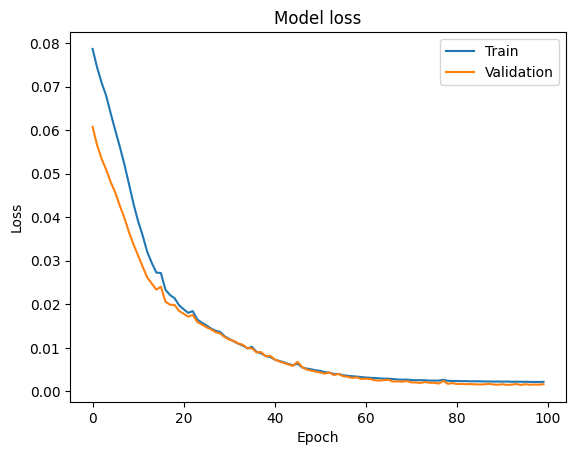

In [40]:
from matplotlib import pyplot as plt
from MyNeuralNetwork import MyNeuralNetwork

#Create the neural network and train
nn = MyNeuralNetwork(layers=[x_scaled.shape[1],9,5,1], nEpochs=100, learning_rate=0.001, momentum=0.1, activation='relu', validation_set=validation_percentage)
nn.fit(x_scaled, y_scaled)

# Optional: Plot the evolution of the training and validation errors  
(loss, val_loss) = nn.loss_epochs()
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

---Test---
R2 Score:  0.9671855409856432
MSE:  0.0018924524002271622
MAE:  0.03130277935948438
---Train---
R2 Score:  0.9776004538317098
MSE:  0.001418724775650897
MAE:  0.02866162382188834

MAPE:  0.40229491737372775


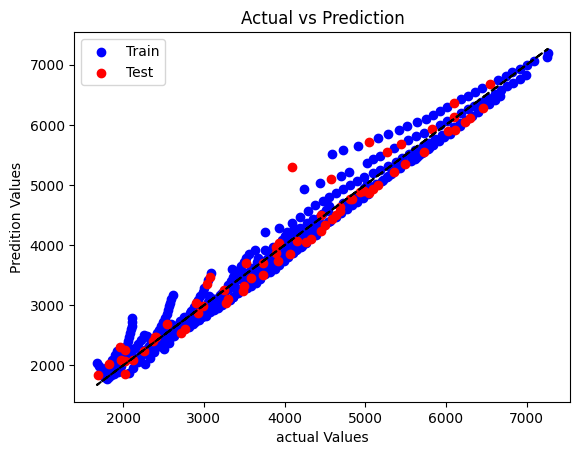

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


# Part 3: Obtaining predictions
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=validation_percentage, shuffle=True)
y_pred_test = nn.predict(x_test)
y_pred_train = nn.predict(x_train)

print("---Test---")
print("R2 Score: ", r2_score(y_test, y_pred_test))
print("MSE: ", mean_squared_error(y_test, y_pred_test))
print("MAE: ", mean_absolute_error(y_test, y_pred_test))
print("---Train---")
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("")
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred_test))

y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_test_unscaled = scaler.inverse_transform(y_pred_test)
y_train_unscaled = scaler.inverse_transform(y_train)
y_pred_train_unscaled = scaler.inverse_transform(y_pred_train)

plt.scatter(y_train_unscaled, y_pred_train_unscaled, color="blue", label="Train")
plt.scatter(y_test_unscaled, y_pred_test_unscaled, color="red", label="Test")
plt.xlabel("actual Values")
plt.ylabel("Predition Values")
plt.title("Actual vs Prediction")
plt.plot(y, y, "--",color="black")
plt.legend()
plt.show()